# Airlines customer satisfaction
This project focuses on analyzing and predicting customer satisfaction levels in the airline industry. By leveraging machine learning techniques, we aim to understand the factors influencing customer satisfaction and develop predictive models to anticipate and improve overall customer experiences.

First we import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Since machine learning works well with numbers, we convert some of the columns into numbers

In [ ]:
df['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1}, inplace=True)
df['Gender'].replace({'Female':0, 'Male':1}, inplace=True)
df['Customer Type'].replace({'disloyal Customer':0, 'Loyal Customer':1}, inplace=True)

In [ ]:
df.Class.value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

We check the correlation with the column 'satisfaction'

In [ ]:
df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)

<ipython-input-23-1d31cec9d670>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)


satisfaction                         1.000000
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type                        0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Arrival Delay in Minutes             0.057582
Departure/Arrival time convenient    0.051601
Departure Delay in Minutes           0.050494
Gender                               0.012211
Gate location                        0.000682
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

We fill the missing values with mean values

In [ ]:
mean_delay = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'].fillna(mean_delay, inplace=True)

In [ ]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [ ]:
df_num = X.select_dtypes(include=['int64', 'float64']).columns
df_cat = X.select_dtypes(include=['object']).columns

In [ ]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

In [ ]:
full_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_transformer, df_num),
        ('cat', cat_transformer, df_cat)
    ]
)

In [ ]:
X_prepared = full_pipeline.fit_transform(X)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_prepared, y)

KNeighborsClassifier()

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
test = pd.read_csv('/content/test.csv')
test.drop(columns=['Unnamed: 0', 'id'], axis=1, inplace=True)
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
test['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1}, inplace=True)
test['Gender'].replace({'Female':0, 'Male':1}, inplace=True)
test['Customer Type'].replace({'disloyal Customer':0, 'Loyal Customer':1}, inplace=True)

In [ ]:
mean_delay = test['Arrival Delay in Minutes'].mean()
test['Arrival Delay in Minutes'].fillna(mean_delay, inplace=True)

In [ ]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
X_test = test.drop('satisfaction', axis=1)
y_test = test['satisfaction']

In [ ]:
X_test_prepared = full_pipeline.fit_transform(X_test)

In [ ]:
test_predict = knn.predict(X_test_prepared)

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': test_predict})
results

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,0
...,...,...
25971,0,0
25972,1,1
25973,0,0
25974,1,1


In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, test_predict)

0.8432387312186979

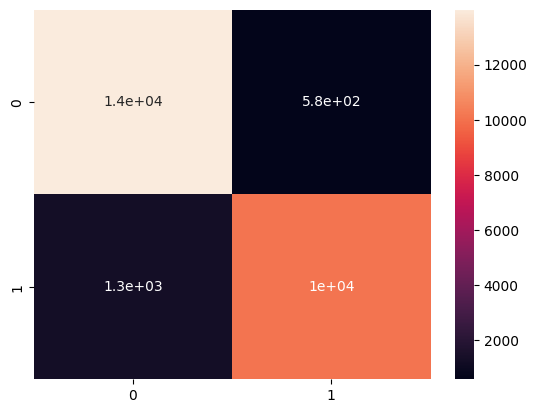

In [ ]:
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(y_test, test_predict), annot=True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(y_test, test_predict)
precision = precision_score(y_test, test_predict)
recall = recall_score(y_test, test_predict)
f1 = f1_score(y_test, test_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.9459687236632643
recall=0.8859072173989301
f1=0.9149533556743048
accuracy=0.9277024946104097
